In [1]:
import torch
from transformers.utils.hub import torch_cache_home

torch.__version__

'2.5.1'

In [3]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [8]:
# Dimensions and shape
scalar.ndim, scalar.shape

(0, torch.Size([]))

## Vectors

In [9]:
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [10]:
vector.shape, vector.ndim

(torch.Size([2]), 1)

In [12]:
# Add a dimension to the vector to obtain row x column
vector.unsqueeze(axis=0).shape

torch.Size([1, 2])

In [13]:
# Still the same size as declaration ?
vector.shape, vector.ndim

(torch.Size([2]), 1)

## Matrix

In [16]:
MATRIX = torch.tensor([[7,8], [9,10]], dtype=torch.int32)
MATRIX

tensor([[ 7,  8],
        [ 9, 10]], dtype=torch.int32)

In [17]:
# Shape and Dimension
MATRIX.shape, MATRIX.ndim

(torch.Size([2, 2]), 2)

## Random Tensors

In [22]:
# Create a random tensor
random_tensor = torch.rand(size=(4,3))
random_tensor

tensor([[0.0221, 0.1384, 0.8083],
        [0.2199, 0.2442, 0.3928],
        [0.8011, 0.7103, 0.2441],
        [0.0170, 0.3452, 0.6103]])

In [23]:
random_tensor.shape, random_tensor.ndim

(torch.Size([4, 3]), 2)

In [24]:
# Creating a tensor for [height, width, channels]
random_image_tensor = torch.rand(size=(275, 401, 3))
random_image_tensor.shape, random_image_tensor.ndim

(torch.Size([275, 401, 3]), 3)

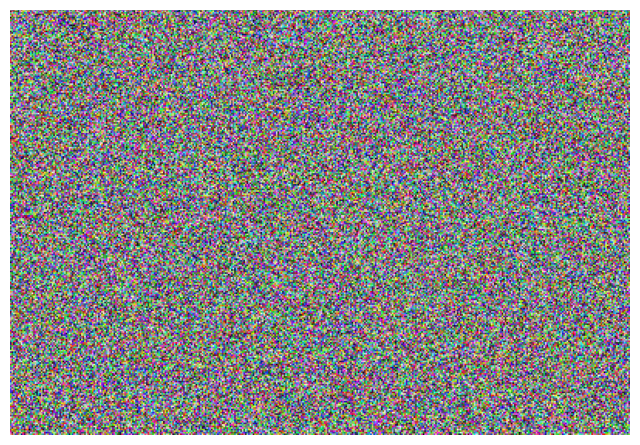

In [25]:
# Display the random generated image
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(random_image_tensor)
plt.axis('off')
plt.show()

## Zeros and Ones

In [26]:
zeros = torch.zeros(size=(4,3))
zeros, zeros.dtype, zeros.shape, zeros.ndim

(tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 torch.float32,
 torch.Size([4, 3]),
 2)

In [27]:
ones = torch.ones(size=(2,2))
ones, ones.dtype, ones.shape, ones.ndim

(tensor([[1., 1.],
         [1., 1.]]),
 torch.float32,
 torch.Size([2, 2]),
 2)

### Creating range with tensors

In [37]:
zero_to_ten = torch.arange(0, 10, 1)
zero_to_ten, zero_to_ten.shape, zero_to_ten.ndim, zero_to_ten.dtype

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([10]), 1, torch.int64)

In [38]:
# Creating 10 zeros
ten_zeros = torch.zeros(size=(1, 10), dtype=torch.int64).squeeze() # Squeeze is for making sure it is the zero_to_ten
ten_zeros, ten_zeros.shape, ten_zeros.ndim

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), torch.Size([10]), 1)

In [39]:
# Or Another way to change the matrix with all zeros
ten_zeros2 = torch.zeros_like(input=zero_to_ten)
ten_zeros2

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Manipulating Tensors
This module deals with tensor operations such as
- addition
- subtraction
- division
- multiplication

In [41]:
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [42]:
# ? Will the tensor change
tensor

tensor([1, 2, 3])

In [43]:
tensor - 10

tensor([-9, -8, -7])

In [44]:
torch.mul(tensor, 5)

tensor([ 5, 10, 15])

In [46]:
# Original still unchanged
tensor

tensor([1, 2, 3])

## Matrix Multiplication

In [51]:
# Note the following operations
tensor * tensor
# this returns a vector product of the elements
# Meaning 1*1, 2*2, 3*3

tensor([1, 4, 9])

In [52]:
# Also note this one
tensor.matmul(tensor) # torch.matmul(tensor, tensor)
# This one is the sum of the tensor * tensor operation meaning
# 1*1 + 2*2 + 3*3 = 14

tensor(14)

In [53]:
# Also `@` is used for matmul
tensor @ tensor

tensor(14)

In [59]:
tensor_A = torch.arange(1,7).reshape(3,2)
tensor_B = torch.arange(7,13).reshape(3,2)
torch.matmul(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [60]:
# Why it Failed ?
# Because matrix mul
# How to achieve the multiplication? Transposing becoming 3x2 * 2x3
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 23,  29,  35],
        [ 53,  67,  81],
        [ 83, 105, 127]])

## Neural Networks

In [73]:
torch.manual_seed(42)
linear = torch.nn.Linear(in_features=2, out_features=5) # In features is for inner dimensions of the input
x = tensor_A.type(torch.float32) #
output = linear(x)
print(output)

tensor([[ 2.3290,  1.2658,  0.6529,  0.5820, -0.0732],
        [ 4.5841,  2.2336,  0.6284,  0.7241,  0.1360],
        [ 6.8391,  3.2014,  0.6039,  0.8661,  0.3452]],
       grad_fn=<AddmmBackward0>)


In [76]:
linear.weight, linear.bias

(Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188]], requires_grad=True),
 Parameter containing:
 tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], requires_grad=True))

### What happened ?
- y = wx + bias so for x the shape was 3x2, and linear weights shape 2x5, and for bias 1,5
- Meaning 3x2 * 2x5 = 3x5 + (1,5) = 3x5

## Min, Max Positional Min and Positional Max

In [89]:
tensor = torch.arange(0, 100, 10)
tensor.min(), tensor.max(), torch.mean(tensor.type(torch.float32)), torch.sum(tensor)

(tensor(0), tensor(90), tensor(45.), tensor(450))

In [91]:
# Positional
print(tensor)
print(f'Index of max value: {torch.argmax(tensor)}')
print(f'Index of min value: {torch.argmin(tensor)}')

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Index of max value: 9
Index of min value: 0


## Reshaping, stacking, Squeeze and unsqueeze

In [93]:
x = torch.arange(1, 8)
x, x.shape

(tensor([1, 2, 3, 4, 5, 6, 7]), torch.Size([7]))

In [104]:
# Add an extra dimension
x_reshape = x.reshape(1, 7) # also x.reshape(1,-1)
x_reshape , x_reshape.shape

(tensor([[1, 2, 3, 4, 5, 6, 7]]), torch.Size([1, 7]))

In [105]:
x_reshape1 = x.reshape(7,1) # equal to x.reshape(-1,1)
x_reshape1 , x_reshape.shape

(tensor([[1],
         [2],
         [3],
         [4],
         [5],
         [6],
         [7]]),
 torch.Size([1, 7]))

In [98]:
### What is reshape(-1,1) or reshape(1,-1) ? later is for accommodating as many rows and other is for accommodating as many columns

In [100]:
x_stacked = torch.stack([x, x, x, x], dim=0) # Dim=0 mean we stack as rows
x_stacked, x_stacked.shape

(tensor([[1, 2, 3, 4, 5, 6, 7],
         [1, 2, 3, 4, 5, 6, 7],
         [1, 2, 3, 4, 5, 6, 7],
         [1, 2, 3, 4, 5, 6, 7]]),
 torch.Size([4, 7]))

In [101]:
x_stacked = torch.stack([x, x, x, x], dim=1)
x_stacked, x_stacked.shape

(tensor([[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3],
         [4, 4, 4, 4],
         [5, 5, 5, 5],
         [6, 6, 6, 6],
         [7, 7, 7, 7]]),
 torch.Size([7, 4]))

In [106]:
# Squeezing the tensor
x_squeezed = x_reshape.squeeze()
x_squeezed, x_squeezed.shape

(tensor([1, 2, 3, 4, 5, 6, 7]), torch.Size([7]))

In [107]:
x_original = torch.rand(size=(241,204,3))
x_permuted = x_original.permute(2, 0, 1)
print(f'Original shape: {x_original.shape}')
print(f'Permuted shape: {x_permuted.shape}')

Original shape: torch.Size([241, 204, 3])
Permuted shape: torch.Size([3, 241, 204])


## Tensors and Numpy

In [109]:
import numpy as np
arr = np.array([1,2,3,4,5])
tensor = torch.from_numpy(arr)
print(tensor)

tensor([1, 2, 3, 4, 5])


In [110]:
# change the array keeps the tensor
arr = arr +1
print(tensor)
print(arr)

tensor([1, 2, 3, 4, 5])
[2 3 4 5 6]


## Running on GPU

In [111]:
# Since I am using Apple Silicon, then it's a bit new
torch.backends.mps.is_available()

True

In [112]:
device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

In [113]:
torch.mps.device_count()

1

In [114]:
# Putting tensors on the GPU
tensor = torch.tensor([1,2,3])
print(tensor, tensor.device)

tensor_on_gpu = tensor.to(device=device)
print(tensor_on_gpu)

tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='mps:0')


In [116]:
# Moving back to the cpu
tensor_on_gpu.cpu().numpy()

array([1, 2, 3])

## Calculating Gradient

In [118]:
# Finding the gradient
a = torch.tensor(1., requires_grad=True)
b = a**2
c = 5*b
c.backward()
print(a.grad)

tensor(10.)
